In [36]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML

In [37]:
# Load the data
file_path = '../data/FoodKeeper-Data.csv'
data = pd.read_csv(file_path, encoding='latin1')

# Display basic information and first few rows of the data
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ï»¿ID                             661 non-null    float64
 1   Category_ID                       661 non-null    float64
 2   Name                              661 non-null    object 
 3   Name_subtitle                     398 non-null    object 
 4   Keywords                          660 non-null    object 
 5   Pantry_Min                        97 non-null     float64
 6   Pantry_Max                        98 non-null     float64
 7   Pantry_Metric                     131 non-null    object 
 8   Pantry_tips                       65 non-null     object 
 9   DOP_Pantry_Min                    196 non-null    float64
 10  DOP_Pantry_Max                    196 non-null    float64
 11  DOP_Pantry_Metric                 199 non-null    object 
 12  DOP_Pant

(None,
    ï»¿ID  Category_ID        Name  \
 0    1.0          7.0      Butter   
 1    2.0          7.0  Buttermilk   
 2    3.0          7.0      Cheese   
 3    4.0          7.0      Cheese   
 4    5.0          7.0      Cheese   
 
                                  Name_subtitle  \
 0                                          NaN   
 1                                          NaN   
 2  hard such as cheddar, swiss, block parmesan   
 3                 parmesan; shredded or grated   
 4          shredded; cheddar, mozzarella, etc.   
 
                              Keywords  Pantry_Min  Pantry_Max Pantry_Metric  \
 0                              Butter         NaN         NaN           NaN   
 1                          Buttermilk         NaN         NaN           NaN   
 2      Cheese,cheddar, swiss,parmesan         NaN         NaN           NaN   
 3     Cheese,parmesan,shredded,grated         NaN         NaN           NaN   
 4  Cheese,shredded,cheddar,mozzarella         NaN     

In [38]:
data.columns

Index(['ï»¿ID', 'Category_ID', 'Name', 'Name_subtitle', 'Keywords',
       'Pantry_Min', 'Pantry_Max', 'Pantry_Metric', 'Pantry_tips',
       'DOP_Pantry_Min', 'DOP_Pantry_Max', 'DOP_Pantry_Metric',
       'DOP_Pantry_tips', 'Pantry_After_Opening_Min',
       'Pantry_After_Opening_Max', 'Pantry_After_Opening_Metric',
       'Refrigerate_Min', 'Refrigerate_Max', 'Refrigerate_Metric',
       'Refrigerate_tips', 'DOP_Refrigerate_Min', 'DOP_Refrigerate_Max',
       'DOP_Refrigerate_Metric', 'DOP_Refrigerate_tips',
       'Refrigerate_After_Opening_Min', 'Refrigerate_After_Opening_Max',
       'Refrigerate_After_Opening_Metric', 'Refrigerate_After_Thawing_Min',
       'Refrigerate_After_Thawing_Max', 'Refrigerate_After_Thawing_Metric',
       'Freeze_Min', 'Freeze_Max', 'Freeze_Metric', 'Freeze_Tips',
       'DOP_Freeze_Min', 'DOP_Freeze_Max', 'DOP_Freeze_Metric',
       'DOP_Freeze_Tips', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unna

In [39]:
# Step 1: Remove Unnecessary Columns
# Drop columns that are 'Unnamed: 38' through 'Unnamed: 45'
columns_to_drop = [f'Unnamed: {i}' for i in range(38, 46)]
data_cleaned = data.drop(columns=columns_to_drop)

# Step 2: Handle Encoding Issue
# Rename the column 'ï»¿ID' to 'ID'
data_cleaned = data_cleaned.rename(columns={'ï»¿ID': 'ID'})

# Display basic information and first few rows of the cleaned data
data_cleaned_info = data_cleaned.info()
data_cleaned_head = data_cleaned.head()

data_cleaned_info
print(data.head)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                661 non-null    float64
 1   Category_ID                       661 non-null    float64
 2   Name                              661 non-null    object 
 3   Name_subtitle                     398 non-null    object 
 4   Keywords                          660 non-null    object 
 5   Pantry_Min                        97 non-null     float64
 6   Pantry_Max                        98 non-null     float64
 7   Pantry_Metric                     131 non-null    object 
 8   Pantry_tips                       65 non-null     object 
 9   DOP_Pantry_Min                    196 non-null    float64
 10  DOP_Pantry_Max                    196 non-null    float64
 11  DOP_Pantry_Metric                 199 non-null    object 
 12  DOP_Pant

In [40]:
data['Refrigerate_tips']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
773    NaN
774    NaN
775    NaN
776    NaN
777    NaN
Name: Refrigerate_tips, Length: 778, dtype: object

In [41]:
# Step 3: Remove Columns with "tips" in the Name
# Identify columns with "tips" in the name
tips_columns = [col for col in data_cleaned.columns if 'tips' in col.lower()]

# Drop these columns
data_cleaned = data_cleaned.drop(columns=tips_columns)

# Display basic information and first few rows of the further cleaned data
data_cleaned_info = data_cleaned.info()
data_cleaned_head = data_cleaned.head()

data_cleaned_info
print(data_cleaned_head)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                661 non-null    float64
 1   Category_ID                       661 non-null    float64
 2   Name                              661 non-null    object 
 3   Name_subtitle                     398 non-null    object 
 4   Keywords                          660 non-null    object 
 5   Pantry_Min                        97 non-null     float64
 6   Pantry_Max                        98 non-null     float64
 7   Pantry_Metric                     131 non-null    object 
 8   DOP_Pantry_Min                    196 non-null    float64
 9   DOP_Pantry_Max                    196 non-null    float64
 10  DOP_Pantry_Metric                 199 non-null    object 
 11  Pantry_After_Opening_Min          75 non-null     float64
 12  Pantry_A

In [42]:
# Step 4: Rename Columns for Clarity
# Replace "DOP" with "DateOfPurchase" in column names
data_cleaned.columns = data_cleaned.columns.str.replace('DOP_', 'DateOfPurchase_')

# Display the updated column names and first few rows of the data
updated_columns = data_cleaned.columns.tolist()
data_cleaned_head = data_cleaned.head()

updated_columns, data_cleaned_head


(['ID',
  'Category_ID',
  'Name',
  'Name_subtitle',
  'Keywords',
  'Pantry_Min',
  'Pantry_Max',
  'Pantry_Metric',
  'DateOfPurchase_Pantry_Min',
  'DateOfPurchase_Pantry_Max',
  'DateOfPurchase_Pantry_Metric',
  'Pantry_After_Opening_Min',
  'Pantry_After_Opening_Max',
  'Pantry_After_Opening_Metric',
  'Refrigerate_Min',
  'Refrigerate_Max',
  'Refrigerate_Metric',
  'DateOfPurchase_Refrigerate_Min',
  'DateOfPurchase_Refrigerate_Max',
  'DateOfPurchase_Refrigerate_Metric',
  'Refrigerate_After_Opening_Min',
  'Refrigerate_After_Opening_Max',
  'Refrigerate_After_Opening_Metric',
  'Refrigerate_After_Thawing_Min',
  'Refrigerate_After_Thawing_Max',
  'Refrigerate_After_Thawing_Metric',
  'Freeze_Min',
  'Freeze_Max',
  'Freeze_Metric',
  'DateOfPurchase_Freeze_Min',
  'DateOfPurchase_Freeze_Max',
  'DateOfPurchase_Freeze_Metric'],
     ID  Category_ID        Name                                Name_subtitle  \
 0  1.0          7.0      Butter                                      

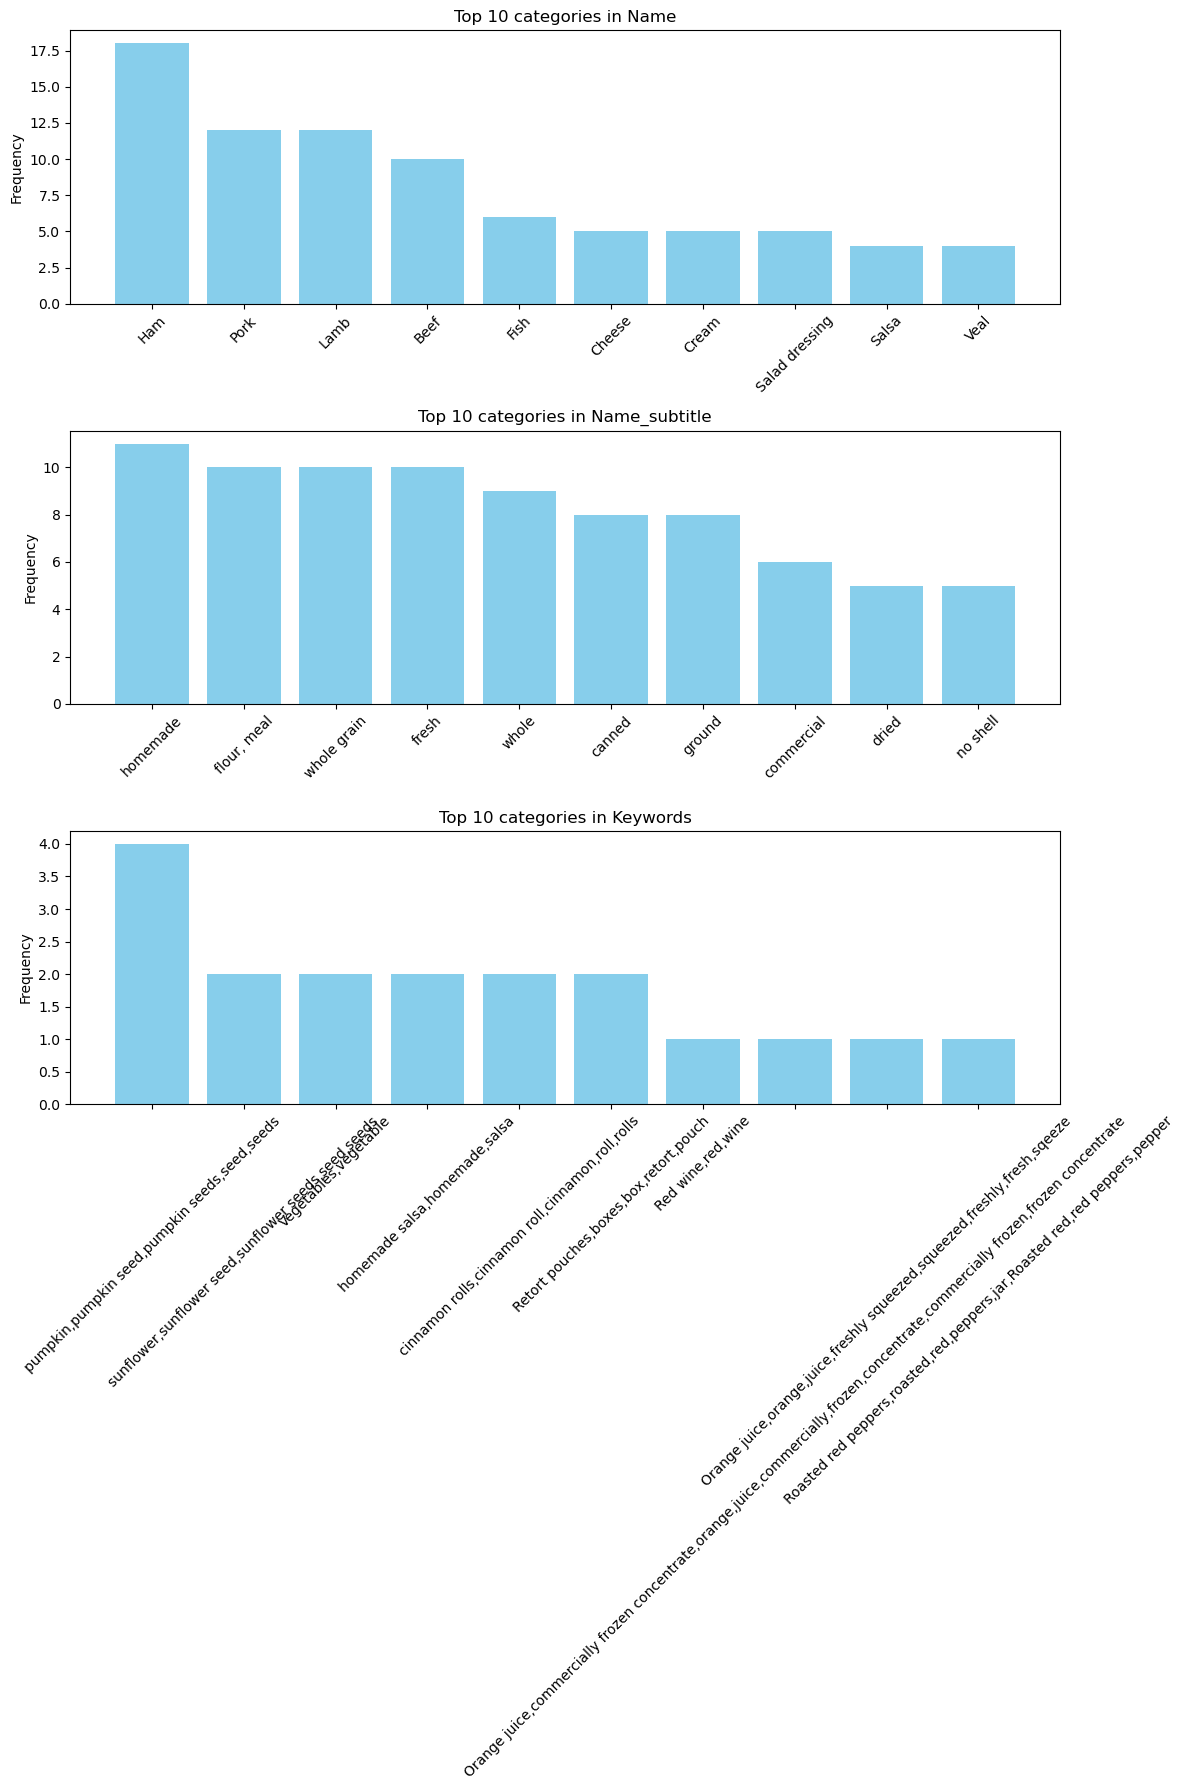

{'Name': Name
 Ham               18
 Pork              12
 Lamb              12
 Beef              10
 Fish               6
 Cheese             5
 Cream              5
 Salad dressing     5
 Salsa              4
 Veal               4
 Name: count, dtype: int64,
 'Name_subtitle': Name_subtitle
 homemade       11
 flour, meal    10
 whole grain    10
 fresh          10
 whole           9
 canned          8
 ground          8
 commercial      6
 dried           5
 no shell        5
 Name: count, dtype: int64,
 'Keywords': Keywords
 pumpkin,pumpkin seed,pumpkin seeds,seed,seeds                                                                                       4
 sunflower,sunflower seed,sunflower seeds,seed,seeds                                                                                 2
 Vegetables,vegetable                                                                                                                2
 homemade salsa,homemade,salsa                               

In [43]:
import matplotlib.pyplot as plt

# Set default N value
N = 10

# Create a figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# List of columns to explore
columns_to_explore = ['Name', 'Name_subtitle', 'Keywords']

# Loop through the columns and visualize the top N categories
for i, col in enumerate(columns_to_explore):
    # Get the value counts of the column
    value_counts = data_cleaned[col].value_counts().head(N)
    
    # Plotting
    axes[i].bar(value_counts.index, value_counts.values, color='skyblue')
    axes[i].set_title(f'Top {N} categories in {col}')
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=45)
    
# Adjust the layout
plt.tight_layout()
plt.show()

# Display the actual frequency counts of the top N categories
top_categories_counts = {col: data_cleaned[col].value_counts().head(N) for col in columns_to_explore}
top_categories_counts


In [44]:
# Identify columns with metrics and their corresponding metric column
metric_columns_pairs = [
    ('Pantry_Min', 'Pantry_Max', 'Pantry_Metric'),
    ('DateOfPurchase_Pantry_Min', 'DateOfPurchase_Pantry_Max', 'DateOfPurchase_Pantry_Metric'),
    ('Refrigerate_Min', 'Refrigerate_Max', 'Refrigerate_Metric'),
    ('DateOfPurchase_Refrigerate_Min', 'DateOfPurchase_Refrigerate_Max', 'DateOfPurchase_Refrigerate_Metric'),
    ('Refrigerate_After_Opening_Min', 'Refrigerate_After_Opening_Max', 'Refrigerate_After_Opening_Metric'),
    ('Refrigerate_After_Thawing_Min', 'Refrigerate_After_Thawing_Max', 'Refrigerate_After_Thawing_Metric'),
    ('Freeze_Min', 'Freeze_Max', 'Freeze_Metric'),
    ('DateOfPurchase_Freeze_Min', 'DateOfPurchase_Freeze_Max', 'DateOfPurchase_Freeze_Metric')
]

# Modified approach to handle both numerical and string data during concatenation
for min_col, max_col, metric_col in metric_columns_pairs:
    new_col = min_col.replace('_Min', '') + '_Text'
    data_cleaned[new_col] = data_cleaned[[min_col, max_col, metric_col]].apply(
        lambda x: f"{x[min_col]}-{x[max_col]} {x[metric_col]}" if pd.notna(x[min_col]) and pd.notna(x[max_col]) else 
                  (f"up to {x[max_col]} {x[metric_col]}" if pd.notna(x[max_col]) else 
                   (f"at least {x[min_col]} {x[metric_col]}" if pd.notna(x[min_col]) else None)), axis=1
    )

# Display the first few rows with the new columns
data_cleaned[[col[0] for col in metric_columns_pairs] + [col[0].replace('_Min', '') + '_Text' for col in metric_columns_pairs]].head()


,Pantry_Min,DateOfPurchase_Pantry_Min,Refrigerate_Min,DateOfPurchase_Refrigerate_Min,Refrigerate_After_Opening_Min,Refrigerate_After_Thawing_Min,Freeze_Min,DateOfPurchase_Freeze_Min,Pantry_Text,DateOfPurchase_Pantry_Text,Refrigerate_Text,DateOfPurchase_Refrigerate_Text,Refrigerate_After_Opening_Text,Refrigerate_After_Thawing_Text,Freeze_Text,DateOfPurchase_Freeze_Text
0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,6.0,None,None,None,1.0-2.0 Months,None,None,None,6.0-9.0 Months
1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,3.0,None,None,None,1.0-2.0 Weeks,None,None,None,3.0-3.0 Months
2,NaN,NaN,NaN,6.0,3.0,NaN,NaN,6.0,None,None,None,6.0-6.0 Months,3.0-4.0 Weeks,None,None,6.0-6.0 Months
3,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,None,None,None,12.0-12.0 Months,None,None,None,None
4,NaN,NaN,NaN,1.0,NaN,NaN,NaN,3.0,None,None,None,1.0-1.0 Months,None,None,None,3.0-4.0 Months


In [45]:
print(data_cleaned.columns)

Index(['ID', 'Category_ID', 'Name', 'Name_subtitle', 'Keywords', 'Pantry_Min',
       'Pantry_Max', 'Pantry_Metric', 'DateOfPurchase_Pantry_Min',
       'DateOfPurchase_Pantry_Max', 'DateOfPurchase_Pantry_Metric',
       'Pantry_After_Opening_Min', 'Pantry_After_Opening_Max',
       'Pantry_After_Opening_Metric', 'Refrigerate_Min', 'Refrigerate_Max',
       'Refrigerate_Metric', 'DateOfPurchase_Refrigerate_Min',
       'DateOfPurchase_Refrigerate_Max', 'DateOfPurchase_Refrigerate_Metric',
       'Refrigerate_After_Opening_Min', 'Refrigerate_After_Opening_Max',
       'Refrigerate_After_Opening_Metric', 'Refrigerate_After_Thawing_Min',
       'Refrigerate_After_Thawing_Max', 'Refrigerate_After_Thawing_Metric',
       'Freeze_Min', 'Freeze_Max', 'Freeze_Metric',
       'DateOfPurchase_Freeze_Min', 'DateOfPurchase_Freeze_Max',
       'DateOfPurchase_Freeze_Metric', 'Pantry_Text',
       'DateOfPurchase_Pantry_Text', 'Refrigerate_Text',
       'DateOfPurchase_Refrigerate_Text', 'Refrigerat

In [46]:
# Identify all textual columns for lowercasing
text_columns = [
    'Name', 'Name_subtitle', 'Keywords',
    'Pantry_Text', 'DateOfPurchase_Pantry_Text', 'Refrigerate_Text',
    'DateOfPurchase_Refrigerate_Text', 'Refrigerate_After_Opening_Text',
    'Refrigerate_After_Thawing_Text', 'Freeze_Text', 'DateOfPurchase_Freeze_Text'
]

# Convert all textual columns to lowercase
data_cleaned[text_columns] = data_cleaned[text_columns].applymap(lambda x: str(x).lower() if pd.notna(x) else x)

# Display first few rows of the cleaned data
data_cleaned[text_columns].head()


,Name,Name_subtitle,Keywords,Pantry_Text,DateOfPurchase_Pantry_Text,Refrigerate_Text,DateOfPurchase_Refrigerate_Text,Refrigerate_After_Opening_Text,Refrigerate_After_Thawing_Text,Freeze_Text,DateOfPurchase_Freeze_Text
0,butter,NaN,butter,None,None,None,1.0-2.0 months,None,None,None,6.0-9.0 months
1,buttermilk,NaN,buttermilk,None,None,None,1.0-2.0 weeks,None,None,None,3.0-3.0 months
2,cheese,"hard such as cheddar, swiss, block parmesan","cheese,cheddar, swiss,parmesan",None,None,None,6.0-6.0 months,3.0-4.0 weeks,None,None,6.0-6.0 months
3,cheese,parmesan; shredded or grated,"cheese,parmesan,shredded,grated",None,None,None,12.0-12.0 months,None,None,None,None
4,cheese,"shredded; cheddar, mozzarella, etc.","cheese,shredded,cheddar,mozzarella",None,None,None,1.0-1.0 months,None,None,None,3.0-4.0 months


In [47]:
data_cleaned = data_cleaned.drop('ID', axis=1)
data_cleaned = pd.read_csv('../data/cleaned_data.csv')
pd.set_option('display.max_columns', None)  # Display all columns

data_cleaned = data_cleaned.drop(columns=['DateOfPurchase_Freeze_Max','DateOfPurchase_Freeze_Min','DateOfPurchase_Freeze_Metric','Refrigerate_After_Opening_Max','Refrigerate_After_Opening_Metric','Refrigerate_After_Opening_Min'])
data_cleaned = data_cleaned.drop(columns=['Pantry_Max','Pantry_Metric','Pantry_Min',])
data_cleaned = data_cleaned.drop(columns=['DateOfPurchase_Pantry_Min','DateOfPurchase_Pantry_Max','DateOfPurchase_Pantry_Metric'])
data_cleaned = data_cleaned.drop(columns=['Pantry_After_Opening_Min','Pantry_After_Opening_Max','Pantry_After_Opening_Metric'])
data_cleaned = data_cleaned.drop(columns=['Refrigerate_Max','Refrigerate_Min','Refrigerate_Metric'])
data_cleaned = data_cleaned.drop(columns=['DateOfPurchase_Refrigerate_Max','DateOfPurchase_Refrigerate_Min','DateOfPurchase_Refrigerate_Metric'])
data_cleaned = data_cleaned.drop(columns=['Refrigerate_After_Thawing_Min','Refrigerate_After_Thawing_Max','Refrigerate_After_Thawing_Metric'])
data_cleaned = data_cleaned.drop(columns=['Freeze_Max','Freeze_Min','Freeze_Metric'])

KeyError: "['Pantry_Max', 'Pantry_Metric', 'Pantry_Min'] not found in axis"

In [ ]:
from IPython.display import display, HTML

# Use CSS to create a scrollable dataframe view
css = """
    table {
        width: 100%;
        border-collapse: collapse;
        border: 1px solid black;
    }
    th, td {
        border: 1px solid black;
    }
    .dataframe {
        width: 100%;
        overflow-x: scroll;
    }
"""
HTML('<style>{}</style>'.format(css))

# Display the dataframe
display(HTML(data_cleaned.head().to_html(index=False)))


In [ ]:
# Save the cleaned data to a new CSV file
data_cleaned.to_csv('../data/cleaned_data.csv', index=False)